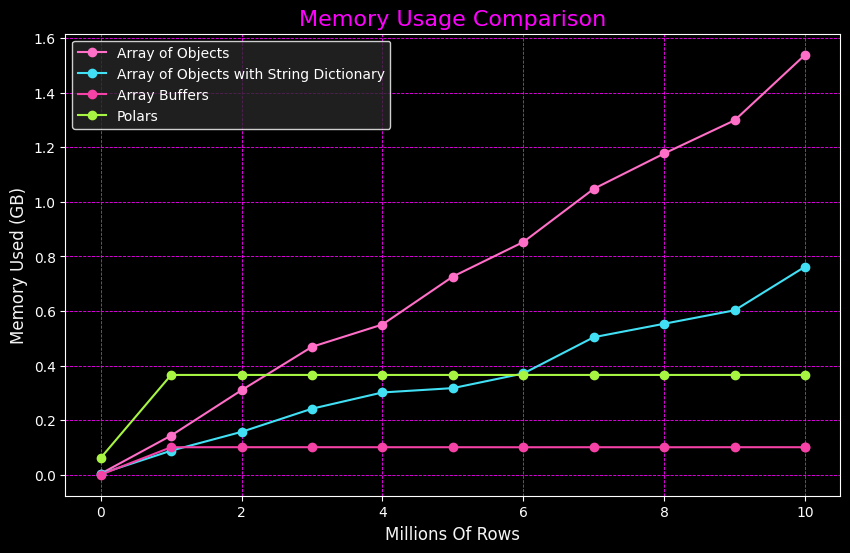

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
array_of_objects_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayOfObjects_10000000.csv")
array_of_objects_string_dict_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayOfObjectsStringDictionary_10000000.csv")
array_buffer_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayBuffer_10000000.csv")
polars_df = pd.read_csv("/home/jack/code/df.ts/stats/polars_10000000.csv")

# Convert 'heapUsed' from bytes to gigabytes
array_of_objects_df['heapUsed_GB'] = array_of_objects_df['heapUsed'] / (1024 ** 3)
array_of_objects_string_dict_df['heapUsed_GB'] = array_of_objects_string_dict_df['heapUsed'] / (1024 ** 3)

# Convert 'rows' to millions of rows
array_of_objects_df['rows_millions'] = array_of_objects_df['rows'] / 1_000_000
array_of_objects_string_dict_df['rows_millions'] = array_of_objects_string_dict_df['rows'] / 1_000_000

array_buffer_df['arrayBuffers_GB'] = array_buffer_df['arrayBuffers'] / (1024 ** 3)
array_buffer_df['rows_millions'] = array_buffer_df['rows'] / 1_000_000

# Polars: Create stub rows for 0, 1M, 2M, ..., 10M and fill in between with the same value as the last row (10M)
rows = range(1_000_000, 10_000_000, 1_000_000)

# Select the first row (0) and last row (10 million) from the original polars_df
first_row = polars_df.iloc[0]
last_row = polars_df.iloc[1]  # Since the second row contains 10 million data

# Create DataFrame for rows in between (1M to 9M)
middle_rows = pd.DataFrame({
    'rows': rows,
    'rss': [last_row['rss']] * len(rows),
    'heapTotal': [last_row['heapTotal']] * len(rows),
    'heapUsed': [last_row['heapUsed']] * len(rows),
    'external': [last_row['external']] * len(rows),
    'arrayBuffers': [last_row['arrayBuffers']] * len(rows),
    'timestamp': [last_row['timestamp']] * len(rows),
})

# Combine the first row, middle rows, and the last row into one DataFrame
polars_filled_df = pd.concat([polars_df.iloc[[0]], middle_rows, polars_df.iloc[[1]]], ignore_index=True)

# Convert 'rss' to GB
polars_filled_df['rss_GB'] = polars_filled_df['rss'] / (1024 ** 3)

# Convert 'rows' to millions of rows
polars_filled_df['rows_millions'] = polars_filled_df['rows'] / 1_000_000

# Apply Synthwave-style customizations
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))

# Plot data with synthwave colors
plt.plot(array_of_objects_df['rows_millions'], array_of_objects_df['heapUsed_GB'], marker='o', linestyle='-', color='#ff6ec7', label='Array of Objects')
plt.plot(array_of_objects_string_dict_df['rows_millions'], array_of_objects_string_dict_df['heapUsed_GB'], marker='o', linestyle='-', color='#42e0f5', label='Array of Objects with String Dictionary')
plt.plot(array_buffer_df['rows_millions'], array_buffer_df['arrayBuffers_GB'], marker='o', linestyle='-', color='#f542a7', label='Array Buffers')
plt.plot(polars_filled_df['rows_millions'], polars_filled_df['rss_GB'], marker='o', linestyle='-', color='#a7f542', label='Polars')

# Add labels and title with contrasting synthwave colors
plt.xlabel('Millions Of Rows', fontsize=12, color='#f5f5f5')
plt.ylabel('Memory Used (GB)', fontsize=12, color='#f5f5f5')
plt.title('Memory Usage Comparison', fontsize=16, color='#ff00ff')

# Add legend with a custom background and border color
legend = plt.legend(loc='upper left', fontsize=10)
legend.get_frame().set_edgecolor('#ffffff')
legend.get_frame().set_facecolor('#282828')

# Add grid with neon colors
plt.grid(True, which='both', color='#ff00ff', linestyle='--', linewidth=0.6)

plt.savefig('/home/jack/code/df.ts/slides/memory_usage_comparison.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
